# Results.ipynb

Investigate results from the runTests notebook

To run your own versions of this data, you can either run the `runTests.ipynb`, which will generate a single run test case.  Alternatively, if you want a more statistically significant version of this, run the `avg_sample.py` version.  This version can run the tests multiple times to get a more statistically representative result.  See the README.md at the base of this project for more information.


# Test Description(s)

| Test Number | Description                                                  |
|-------------|--------------------------------------------------------------|
| Test 1      | One-Column, integer, Clustered Index Create                  |
| Test 2      | One-Column, integer, Clustered Index Delete                  |
| Test 3      | One-Column, integer, Clustered Index Create  - Extra Records |
| Test 4      | One-Column, integer, Clustered Index Delete  - Extra Records |
| Test 5      | Two-Column, Clustered Index Create                  |
| Test 6      | Two-Column, Clustered Index Delete                  |
| Test 7      | Two-Column, Clustered Index Create  - Extra Records |
| Test 8      | Two-Column, Clustered Index Delete  - Extra Records |
| Test 9      | Single-Column, Non-Clustered Index Create                  |
| Test 10     | Single-Column, Non-Clustered Index Delete                  |
| Test 11     | Single-Column, Non-Clustered Index Create  - Extra Records |
| Test 12     | Single-Column, Non-Clustered Index Delete  - Extra Records |
| Test 13     | Dual-Column, Non-Clustered Index Create                  |
| Test 14     | Dual-Column, Non-Clustered Index Delete                  |
| Test 15     | Dual-Column, Non-Clustered Index Create  - Extra Records |
| Test 16     | Dual-Column, Non-Clustered Index Delete  - Extra Records |

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
with open(f"results_400000.pkl", "rb") as file:
    results_400 = pkl.load(file)

with open(f"results_1500000.pkl", "rb") as file:
    results_1500 = pkl.load(file)

In [3]:
pdResults = pd.DataFrame.from_dict(results_400.values())
pdResults["Time (s)"] = pdResults["Time (s)"].apply(lambda x: list(map(float, x)))

pd1500Results = pd.DataFrame.from_dict(results_1500.values())
pd1500Results["Time (s)"] = pd1500Results["Time (s)"].apply(lambda x: list(map(float, x)))
pdResults["400k Time (s) - Avg"] = pdResults["Time (s) - Avg"].astype(float)
pdResults["1500k Time (s) - Avg"] = pd1500Results["Time (s) - Avg"].astype(float)
pdResults[["Test", "Category", "Description", "400k Time (s) - Avg", "1500k Time (s) - Avg"]]

,Test,Category,Description,400k Time (s) - Avg,1500k Time (s) - Avg
0,Test 1,Cluster Add,"One-Column, integer, Clustered Index Create",7.97,51.65
1,Test 2,Cluster Drop,"One-Column, integer, Clustered Index Delete",0.09,0.30
2,Test 3,Cluster Add,"One-Column, integer, Clustered Index Create - ...",14.78,95.64
3,Test 4,Cluster Drop,"One-Column, integer, Clustered Index Delete - ...",0.12,1.27
4,Test 5,Cluster Add,"Two-Column, Clustered Index Create",8.16,49.15
5,Test 6,Cluster Drop,"Two-Column, Clustered Index Delete",0.10,0.31
6,Test 7,Cluster Add,"Two-Column, Clustered Index Create - Extra Rec...",16.26,79.97
7,Test 8,Cluster Drop,"Two-Column, Clustered Index Delete - Extra Rec...",0.14,0.55
8,Test 9,Non-Cluster Add,"Single-Column, Non-Clustered Index Create",1.99,12.05
9,Test 10,Non-Cluster Delete,"Single-Column, Non-Clustered Index Delete",0.04,0.11


In [4]:
pdGraphData = pdResults[["Test", "Category", "Time (s)", "Time (s) - Avg"]].copy(deep=True)
pdGraphData["Sample"] = "400k"
pd1500Results["Sample"] = "1500k"
pdGraphData = pd.concat([pdGraphData, pd1500Results[["Test", "Category", "Sample", "Time (s)", "Time (s) - Avg"]].copy(deep=True)])
pdGraphData["Time (s) - Avg"] = pdGraphData["Time (s) - Avg"].astype(float)
pdGraphData.reset_index(drop=True, inplace=True)

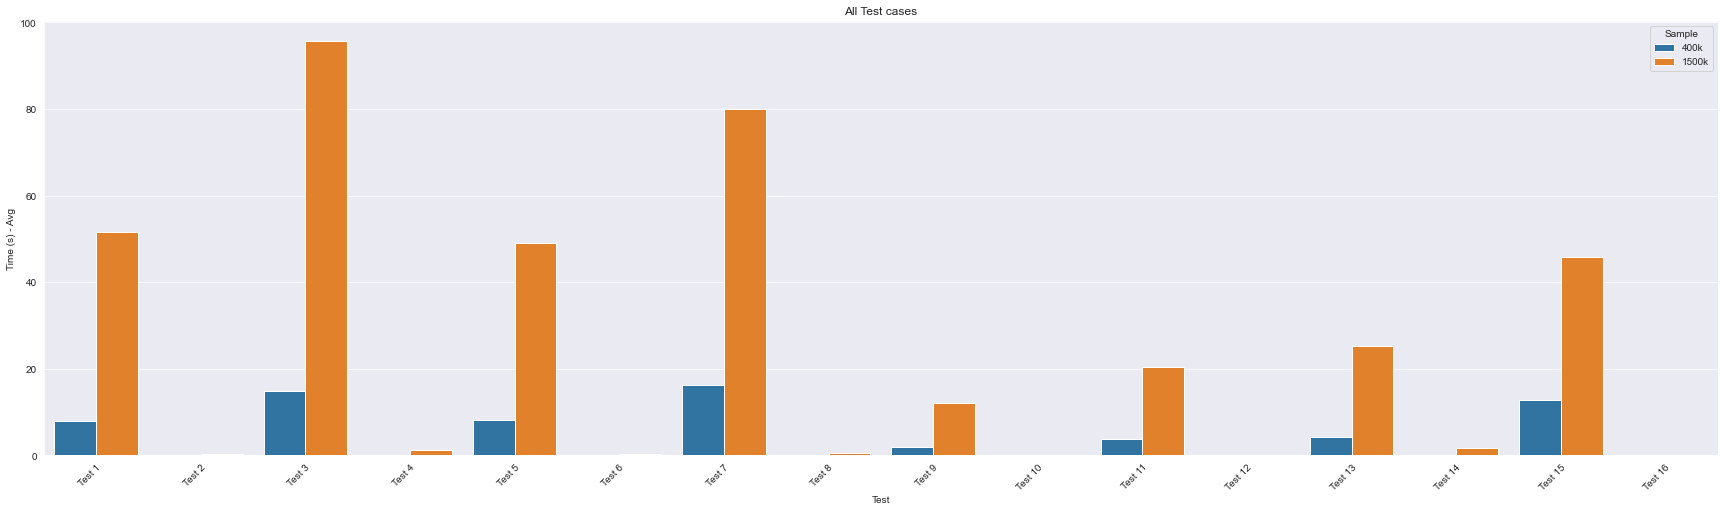

In [5]:
fig, ax = plt.subplots(figsize=(30,8))
sns.barplot(data=pdGraphData, x="Test", y="Time (s) - Avg", hue="Sample", ax=ax).set(title='All Test cases')
#sns.boxplot(data=pdGraphData, x="Test", y="Time (s)", hue="Sample", ax=ax).set(title='All Test Cases')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.show()

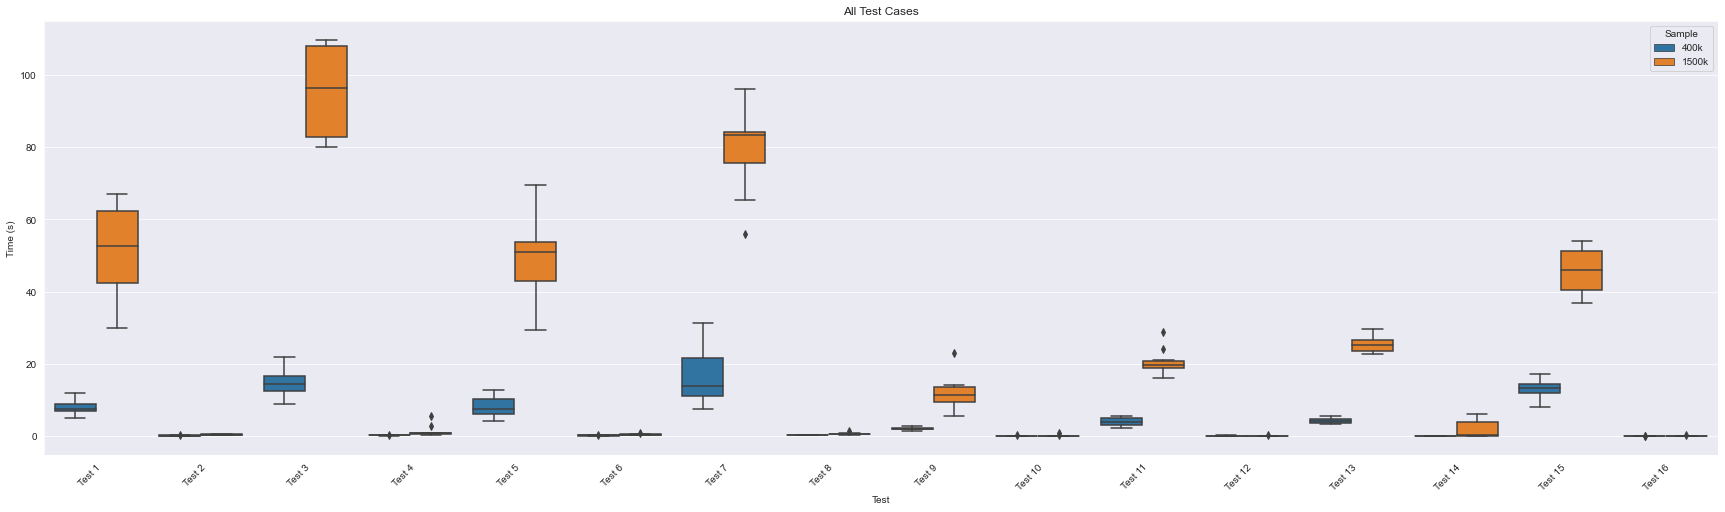

In [6]:
pdGraphDataExplode = pdGraphData.explode("Time (s)")
fig, ax = plt.subplots(figsize=(30,8))
sns.boxplot(data=pdGraphDataExplode, x="Test", y="Time (s)", hue="Sample", ax=ax).set(title='All Test Cases')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.show()